<a href="https://colab.research.google.com/github/MagicMoleMM/ML/blob/main/TF_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
vgg19 = tf.keras.applications.VGG19()

574710816/574710816 [==============================] - 3s 0us/step


In [3]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
vgg19 = tf.keras.applications.VGG19(weights='imagenet')

In [5]:
!wget https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg -O panda.jpg
!wget https://5.imimg.com/data5/CB/DA/MY-24779561/cricket-tennis-balls-500x500.jpg -O ball.jpg
!wget https://image.shutterstock.com/image-photo/luxury-house-beautiful-landscaping-on-260nw-448870624.jpg -O house.jpg

--2023-02-15 10:27:53--  https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg [following]
--2023-02-15 10:27:53--  https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116068 (113K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 113.35K  --.-KB/s    in 0.002s  

2023-02-15 10:27:53 (62.9 MB/s) - ‘panda.jpg’ saved [116068/116068]

--2023-02-15 10:27:53--  https://5.imimg.com/data5/CB/DA/MY-

In [6]:
def read_and_show(path):
    image = plt.imread(path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    return image

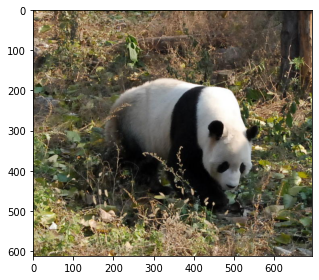

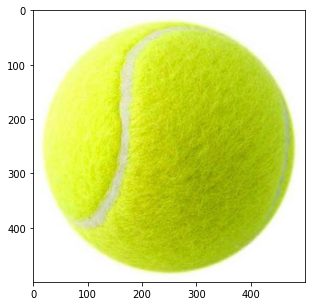

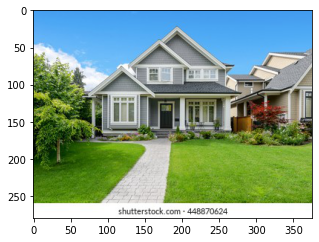

In [7]:
panda = read_and_show("panda.jpg")
ball = read_and_show("ball.jpg")
house = read_and_show("house.jpg")

In [8]:
vgg19.predict(panda.astype(np.float32)[None, ...])

ValueError: ignored

In [9]:
def prepare_image(image, image_size):
    image = tf.image.resize(image, image_size)
    return image[None, ...]

In [10]:
prepare_image(panda, (224, 224)).numpy().shape

(1, 224, 224, 3)

In [11]:
input_panda = prepare_image(panda, (224,224))
prediction = vgg19.predict(input_panda)

1/1 [==============================] - 7s 7s/step


In [12]:
prediction

array([[1.26810851e-09, 3.44692969e-10, 3.22683604e-08, 5.80737725e-09,
        1.59080162e-08, 3.61617403e-08, 3.78844049e-07, 1.35858358e-09,
        2.15426859e-08, 6.56976917e-10, 1.51247848e-10, 1.48421553e-09,
        3.74344652e-11, 1.09396261e-08, 1.57302349e-09, 8.33314251e-11,
        1.26601663e-11, 1.62167950e-08, 5.11569738e-08, 1.30277087e-07,
        1.11701565e-10, 5.42664837e-11, 1.20430138e-10, 4.86382756e-09,
        5.09607564e-11, 1.74633155e-11, 6.35700173e-12, 1.71718520e-12,
        7.51460838e-11, 9.12543641e-09, 6.41461233e-12, 6.25384189e-11,
        1.00891960e-11, 4.55176385e-09, 1.04403861e-10, 5.48163806e-11,
        5.16539256e-10, 4.62330660e-11, 1.09567121e-11, 1.68759234e-12,
        2.47212546e-11, 1.18264122e-12, 2.68371507e-13, 3.49640260e-12,
        1.37550876e-12, 2.89461705e-10, 6.78020001e-11, 4.10794402e-12,
        9.53748636e-10, 3.84939858e-11, 4.19418077e-11, 8.46432968e-09,
        7.96185895e-11, 2.28018888e-11, 7.51532517e-11, 6.718168

In [16]:
from tensorflow.keras.applications.vgg19 import decode_predictions

decode_predictions(prediction)

[[('n02510455', 'giant_panda', 0.999424),
  ('n02445715', 'skunk', 0.00029818853),
  ('n02120079', 'Arctic_fox', 0.00017282103),
  ('n02395406', 'hog', 6.697284e-05),
  ('n02114548', 'white_wolf', 8.604828e-06)]]

In [19]:
from tensorflow.keras.applications.vgg19 import preprocess_input
# добавим этап препроцессинга и получим еще более правильный ответ

input_panda = preprocess_input(input_panda)
prediction = vgg19.predict(input_panda)
decode_predictions(prediction)

ModuleNotFoundError: ignored

In [17]:

def make_prediction(model, preprocess_input, decode_predictions, image):
    img_size = (model.input_shape[1], model.input_shape[2])
    input_image = prepare_image(image, img_size)
    input_image = preprocess_input(input_image)
    print(f"Image shape: {input_image.shape}. Max: {input_image.numpy().max()}. Min: {input_image.numpy().min()}.")
    
    prediction = model.predict(input_image)
    return decode_predictions(prediction)

In [18]:
make_prediction(vgg19, preprocess_input, decode_predictions, ball)

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -103.93900299072266.
1/1 [==============================] - 0s 22ms/step


[[('n04409515', 'tennis_ball', 0.9998061),
  ('n04039381', 'racket', 0.00012015958),
  ('n03445777', 'golf_ball', 3.160171e-05),
  ('n03134739', 'croquet_ball', 8.094177e-06),
  ('n07749582', 'lemon', 7.51947e-06)]]